## Load & Understand Data

In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('Telco-Customer-Churn.csv')
original = pd.read_csv('Telco-Customer-Churn.csv')  # Or wherever it comes from

# Then copy Churn
df['Churn'] = original['Churn']

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [2]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values properly
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



##  Exploratory Data Analysis (EDA)

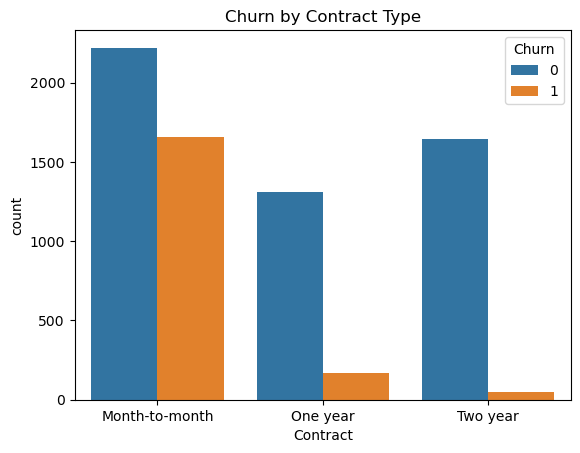

Interpretation: 
Customers on month-to-month contracts churn more often than those on long-term contracts. Encouraging longer contracts may help reduce churn.


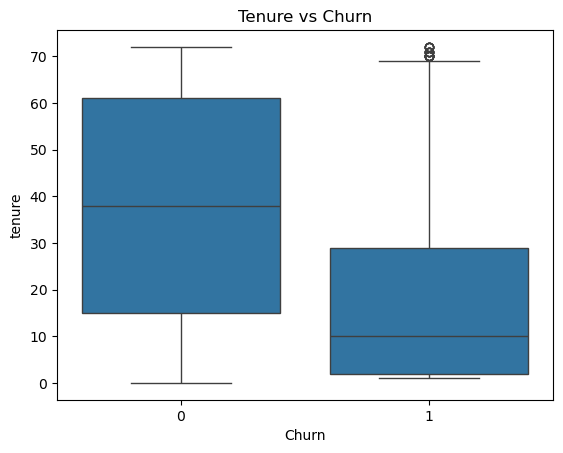

Interpretation: 
Customers who churn tend to have shorter tenure. Focusing on engaging new customers could improve retention.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.savefig('images/Churn by Contract Type.png', bbox_inches='tight')
plt.show()
### Interpretation
print("""Interpretation: 
Customers on month-to-month contracts churn more often than those on long-term contracts. Encouraging longer contracts may help reduce churn.""")

# Churn by tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.savefig('images/Churn by tenure.png', bbox_inches='tight')
plt.show()
### Interpretation:
print("""Interpretation: 
Customers who churn tend to have shorter tenure. Focusing on engaging new customers could improve retention.""")



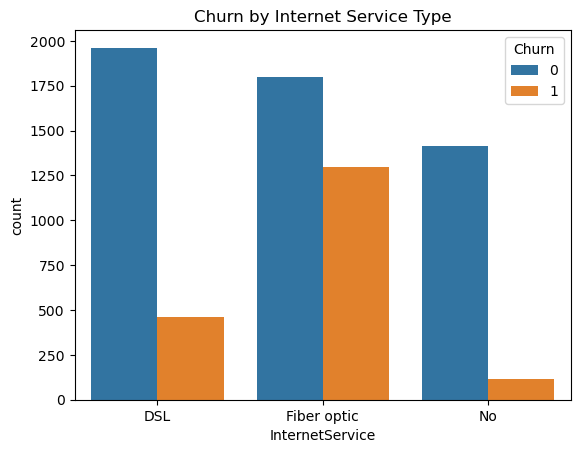

Interpretation:
This plot shows how churn varies with different internet service types.
Customers with Fiber optic tend to churn more than those with DSL or no internet service.
This might indicate performance or pricing issues specific to fiber optic plans.


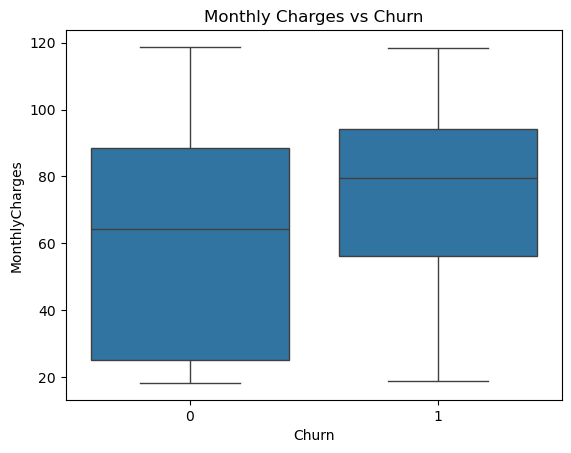

Interpretation:
Customers who churn usually have higher monthly charges on average than those who stay.
High charges could be a reason for dissatisfaction, so reviewing pricing or offering discounts may help retain these customers.


In [27]:
# Churn by Internet Service Type
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.savefig('images/Churn by Internet Service Type.png', bbox_inches='tight')
plt.show()
### Interpretation:
print("""Interpretation:
This plot shows how churn varies with different internet service types.
Customers with Fiber optic tend to churn more than those with DSL or no internet service.
This might indicate performance or pricing issues specific to fiber optic plans.""")

#Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.savefig('images/Monthly Charges vs Churn.png', bbox_inches='tight')
plt.show()
### Interpretation:
print("""Interpretation:
Customers who churn usually have higher monthly charges on average than those who stay.
High charges could be a reason for dissatisfaction, so reviewing pricing or offering discounts may help retain these customers.""")

## Feature Engineering
### -One-hot encode categorical variables.

### -Split into train/test sets.

In [5]:
## Encoding Churn Manually
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [6]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build Predictive Model
### -Logistic Regression

### -Decision Tree / Random Forest


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Scale numeric features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(max_iter=2000)  # increased iterations
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[933 103]
 [151 222]]

Accuracy Score: 0.8197303051809794

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Evaluate All Models with Extended Metrics & Visualize Performance

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.819730,0.683077,0.595174,0.636103
4,Voting Classifier,0.802697,0.698745,0.447721,0.545752
2,Random Forest,0.794180,0.656604,0.466488,0.545455
3,XGBoost,0.789212,0.628378,0.498660,0.556054
1,Decision Tree,0.715401,0.462766,0.466488,0.464619


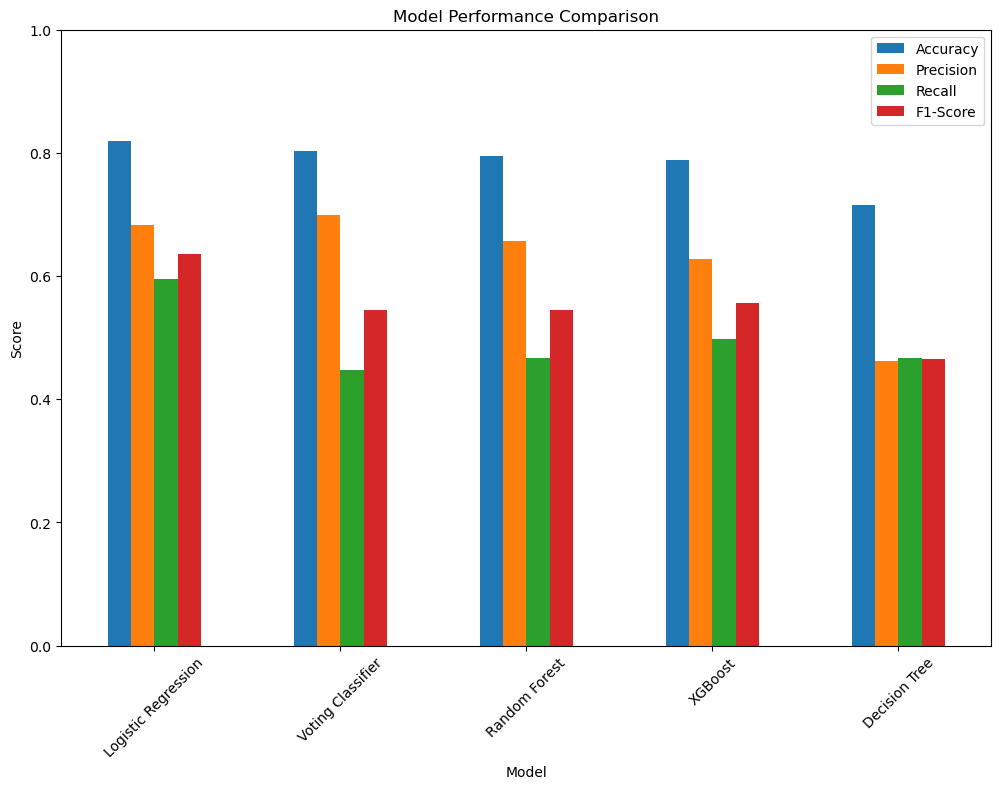


What the Bar Chart Explains:

- It shows how each model performs on four key metrics:
  - Accuracy: How often predictions are correct.
  - Precision: How many predicted churns were actually churn.
  - Recall: How well the model finds all churn customers.
  - F1-Score: Balance between precision & recall.

- Taller bars mean better performance for that metric.

- Use this chart to compare models side by side and pick the one that best balances accuracy, precision, and recall for your business goal.



In [28]:
# ✅ Make sure you have these imports:
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Recreate models dict (best practice)
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
}

# ✅ Use scaled data for Logistic Regression & Voting
extended_results = []

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) 
        
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    extended_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# ✅ Recreate & fit Voting Classifier with consistent scaling
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=5000)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier(eval_metric='logloss'))
    ],
    voting='hard'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred_voting)
prec = precision_score(y_test, y_pred_voting)
rec = recall_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)
extended_results.append({
    'Model': 'Voting Classifier',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-Score': f1
})

# ✅ Create DataFrame for easy viewing
metrics_df = pd.DataFrame(extended_results).sort_values(by='Accuracy', ascending=False)
display(metrics_df)

# ✅ Plot all metrics side-by-side
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.savefig('images/Model Performance Comparison.png', bbox_inches='tight')
plt.show()

#  explanation for the bar chart
print("""
What the Bar Chart Explains:

- It shows how each model performs on four key metrics:
  - Accuracy: How often predictions are correct.
  - Precision: How many predicted churns were actually churn.
  - Recall: How well the model finds all churn customers.
  - F1-Score: Balance between precision & recall.

- Taller bars mean better performance for that metric.

- Use this chart to compare models side by side and pick the one that best balances accuracy, precision, and recall for your business goal.
""")

## Adding a ROC Curve

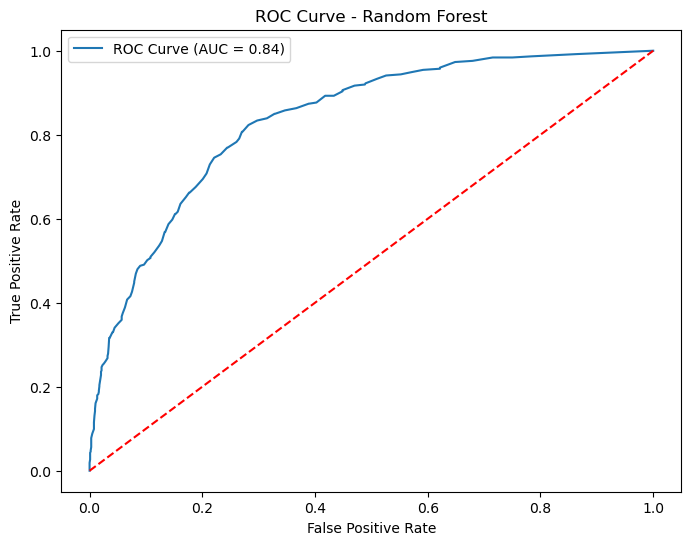


Interpretation:
This ROC Curve shows how well the Random Forest model separates churn vs. no churn.
The curve plots True Positive Rate (Sensitivity) against False Positive Rate.
A curve closer to the top-left corner means better performance.
The Area Under the Curve (AUC) tells us the overall ability to distinguish between classes.



In [29]:
from sklearn.metrics import roc_curve, auc

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.savefig('images/ROC Curve - Random Forest.png', bbox_inches='tight')
plt.show()

print("""
Interpretation:
This ROC Curve shows how well the Random Forest model separates churn vs. no churn.
The curve plots True Positive Rate (Sensitivity) against False Positive Rate.
A curve closer to the top-left corner means better performance.
The Area Under the Curve (AUC) tells us the overall ability to distinguish between classes.
""")

### Random Forest

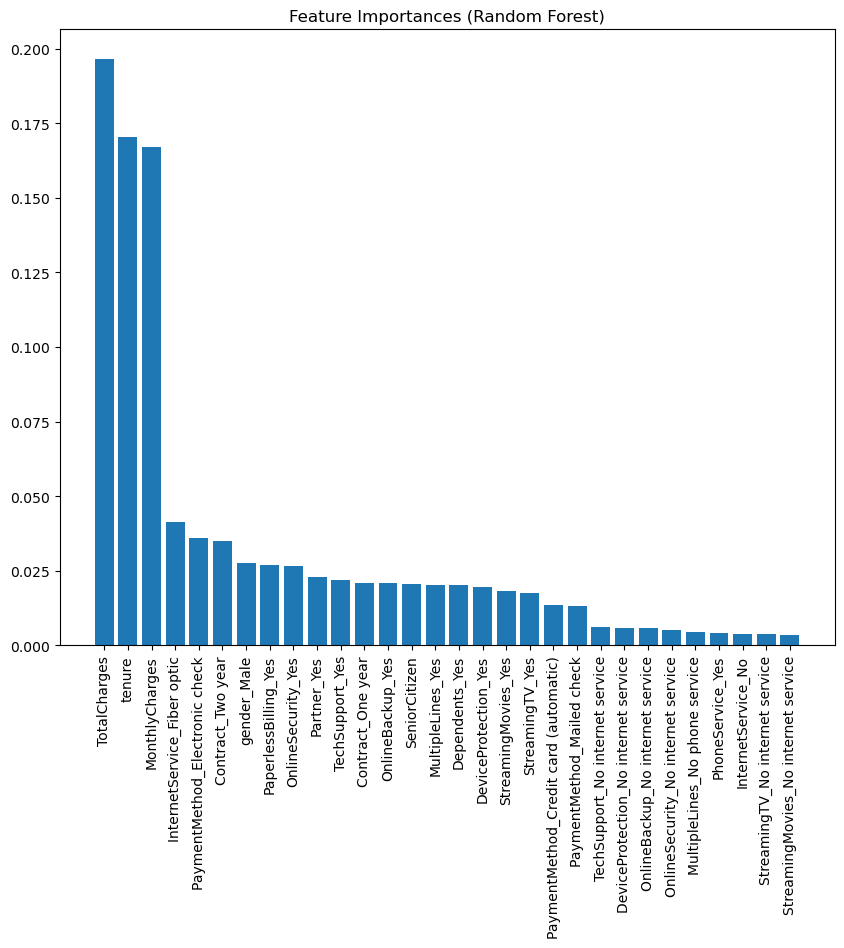


Interpretation:
The confusion matrix heatmap for the Random Forest model shows how well the model predicted customer churn.
- The diagonal boxes (top-left & bottom-right) show correct predictions.
- Off-diagonal boxes show misclassifications.
A good model has most of the color intensity along the diagonal.

The classification report provides Precision, Recall, and F1-Score.
High values indicate that Random Forest performs well on this dataset.
Compare these metrics with other models to choose the best one.



In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.savefig('images/Feature Importances (Random Forest).png', bbox_inches='tight')
plt.show()

# Interpretation
print("""
Interpretation:
The confusion matrix heatmap for the Random Forest model shows how well the model predicted customer churn.
- The diagonal boxes (top-left & bottom-right) show correct predictions.
- Off-diagonal boxes show misclassifications.
A good model has most of the color intensity along the diagonal.

The classification report provides Precision, Recall, and F1-Score.
High values indicate that Random Forest performs well on this dataset.
Compare these metrics with other models to choose the best one.
""")



### Confusion Matrix as Heatmap

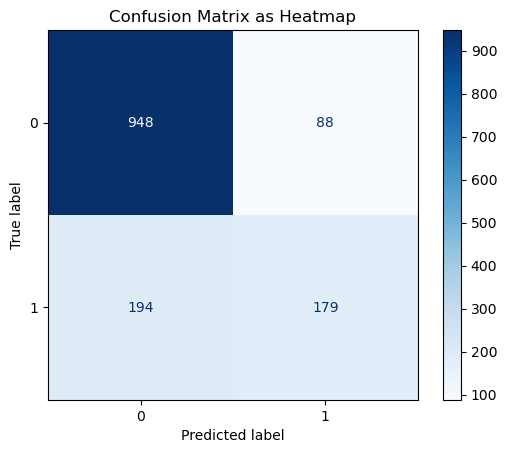

Interpretation:
A Confusion Matrix is a table used to evaluate how well a classification model works.
A heatmap is a color-coded visual representation of the Confusion Matrix.
Instead of just seeing plain numbers, you see them in color blocks —
it makes it very easy to see where your model makes mistakes.


In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix as Heatmap")
plt.savefig('images/Confusion Matrix as Heatmap.png', bbox_inches='tight')
plt.show()
print(
"""Interpretation:
A Confusion Matrix is a table used to evaluate how well a classification model works.
A heatmap is a color-coded visual representation of the Confusion Matrix.
Instead of just seeing plain numbers, you see them in color blocks —
it makes it very easy to see where your model makes mistakes.""")

### Compare All Models Visually

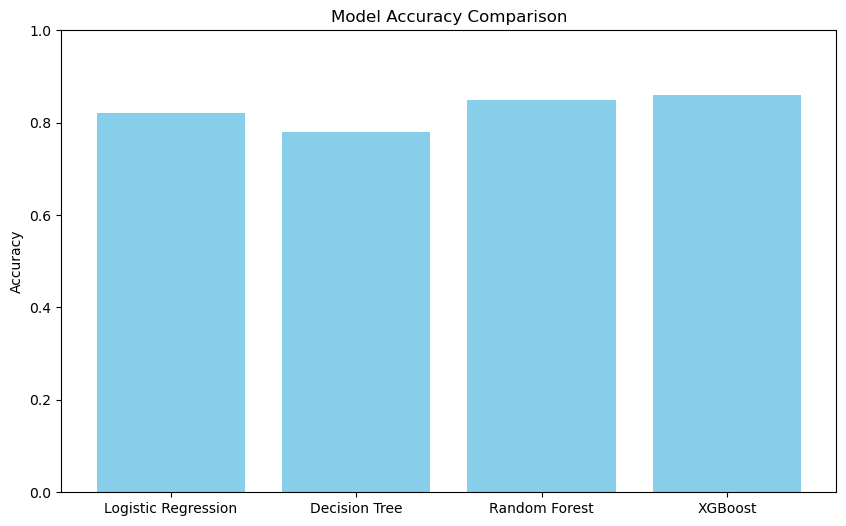


Interpretation:
This bar chart shows the accuracy scores for each machine learning model.
Higher bars mean higher accuracy and better performance on predicting churn.
By comparing the bars, we can easily pick the best model for deployment.



In [32]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.82, 0.78, 0.85, 0.86]  # replace with your results

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.savefig('images/Model Accuracy Comparison.png', bbox_inches='tight')

plt.show()

# Automatically print interpretation below the chart
print("""
Interpretation:
This bar chart shows the accuracy scores for each machine learning model.
Higher bars mean higher accuracy and better performance on predicting churn.
By comparing the bars, we can easily pick the best model for deployment.
""")

## Save the Model

In [33]:
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

### Among the tested models, Logistic Regression achieved the highest accuracy, making it the most accurate model on this dataset. However, it’s always important to check other metrics (precision, recall, f1-score) and business context to decide the final model.
